In [1]:
!pip install "dask[complete]"

In [2]:
import sys
print("Python version")
print(sys.version)
print("Version info.")
print(sys.version_info)

import pip
print(pip.__version__)

Python version
3.11.1 (tags/v3.11.1:a7a450f, Dec  6 2022, 19:58:39) [MSC v.1934 64 bit (AMD64)]
Version info.
sys.version_info(major=3, minor=11, micro=1, releaselevel='final', serial=0)
22.3.1


In [3]:
!pip uninstall dask -y  
!pip install "dask[complete]"  

Found existing installation: dask 2024.5.0
Uninstalling dask-2024.5.0:
  Successfully uninstalled dask-2024.5.0
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.2 MB 825.8 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.2 MB 1.8 MB/s eta 0:00:01
   -------------- ------------------------- 0.4/1.2 MB 2.8 MB/s eta 0:00:01
   ----------------------- ---------------- 0.7/1.2 MB 3.6 MB/s eta 0:00:01
   ------------------------------ --------- 0.9/1.2 MB 4.0 MB/s eta 0:00:01
   ---------------------------------- ----- 1.1/1.2 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
 

In [4]:
import sys
print(sys.executable)

c:\Users\efthi\AppData\Local\Programs\Python\Python311\python.exe


In [5]:
!{sys.executable} -m pip install "dask[complete]"


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import dask.dataframe as dd


pandas_df = pd.read_excel('main_data.xlsx')  


df = dd.from_pandas(pandas_df, npartitions=3)

In [7]:
print("Columns in DataFrame:", df.columns)


if 'order_date' not in df.columns:
    df['order_date'] = dd.to_datetime(df['order date (DateOrders)'], errors='coerce')


if 'Year' not in df.columns or 'Month' not in df.columns:
    df['Year'] = df['order_date'].dt.year
    df['Month'] = df['order_date'].dt.month

Columns in DataFrame: Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Fname', 'Customer Id', 'Customer Lname',
       'Customer Segment', 'Customer State', 'Customer Street',
       'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude',
       'Longitude', 'Market', 'Order City', 'Order Country',
       'Order Customer Id', 'order date (DateOrders)', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id',
       'Product Category Id', 'Product Description', 'Product Ima

Bar Chart for Sales by Customer City

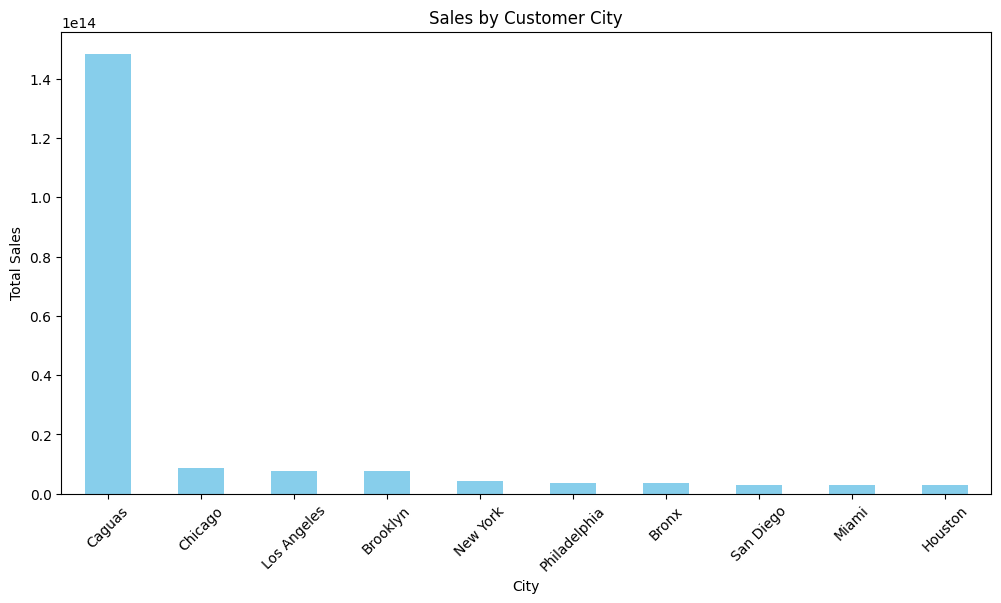

In [8]:
import matplotlib.pyplot as plt
import dask.dataframe as dd

city_sales = df.groupby('Customer City')['Sales per customer'].sum().compute()


city_sales = city_sales.sort_values(ascending=False)[:10]  


plt.figure(figsize=(12, 6))
city_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Customer City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


Pie Chart for Sales Distribution by Payment Type

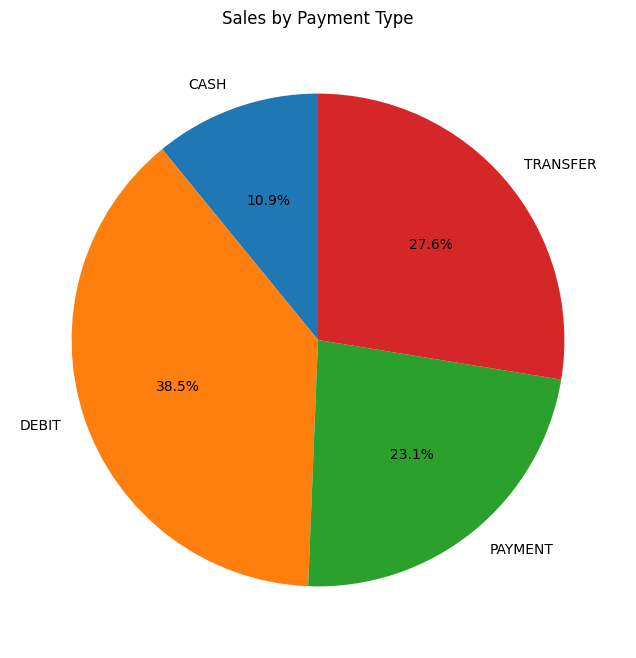

In [9]:
import matplotlib.pyplot as plt


sales_by_payment_type = df.groupby('Type')['Sales per customer'].sum().compute()


plt.figure(figsize=(8, 8))
sales_by_payment_type.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales by Payment Type')
plt.ylabel('')
plt.show()



Combined Bar and Line Chart for Sales and Profits by Month

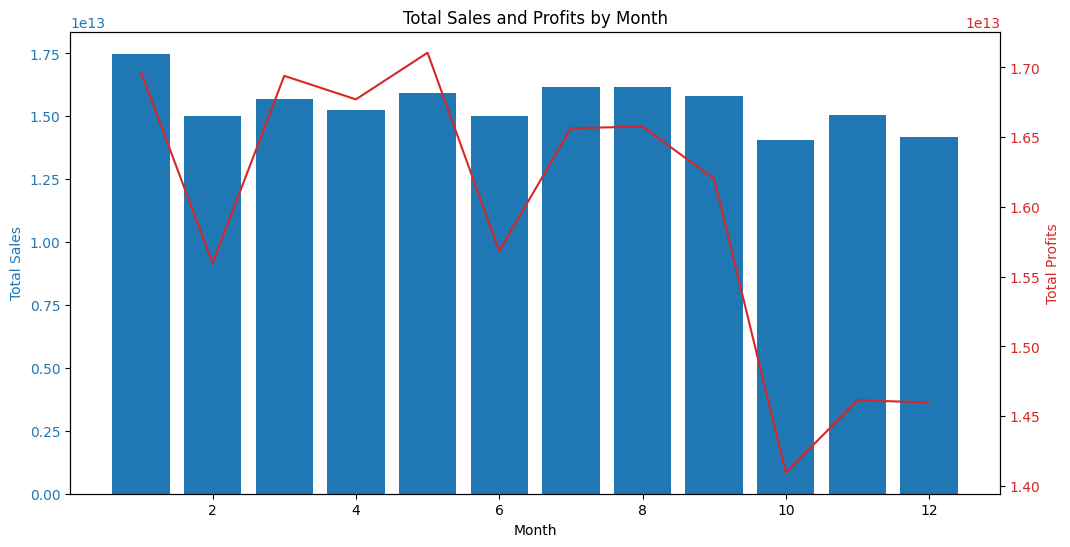

In [10]:
monthly_sales = df.groupby('Month')['Sales per customer'].sum().compute()
monthly_profits = df.groupby('Month')['Benefit per order'].sum().compute()

fig, ax1 = plt.subplots(figsize=(12, 6))


color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Sales', color=color)
ax1.bar(monthly_sales.index, monthly_sales, color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Total Profits', color=color)  
ax2.plot(monthly_profits.index, monthly_profits, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Total Sales and Profits by Month')
plt.show()


Line Chart for Discount Trends

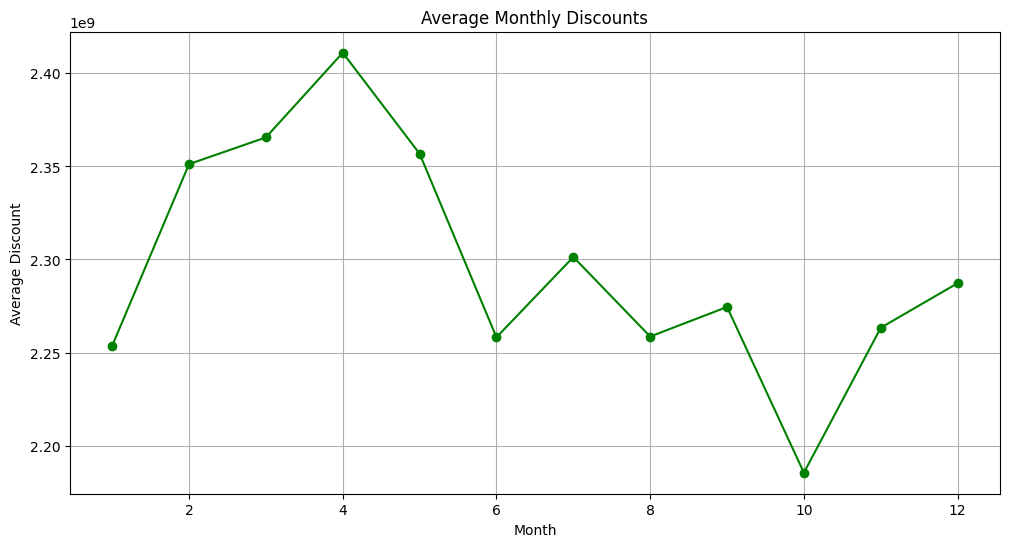

In [11]:
avg_discounts = df.groupby('Month')['Benefit per order'].mean().compute()
plt.figure(figsize=(12, 6))
avg_discounts.plot(kind='line', marker='o', linestyle='-', color='green')
plt.title('Average Monthly Discounts')
plt.xlabel('Month')
plt.ylabel('Average Discount')
plt.grid(True)
plt.show()



Box Plots for Sales Dispersion by Category

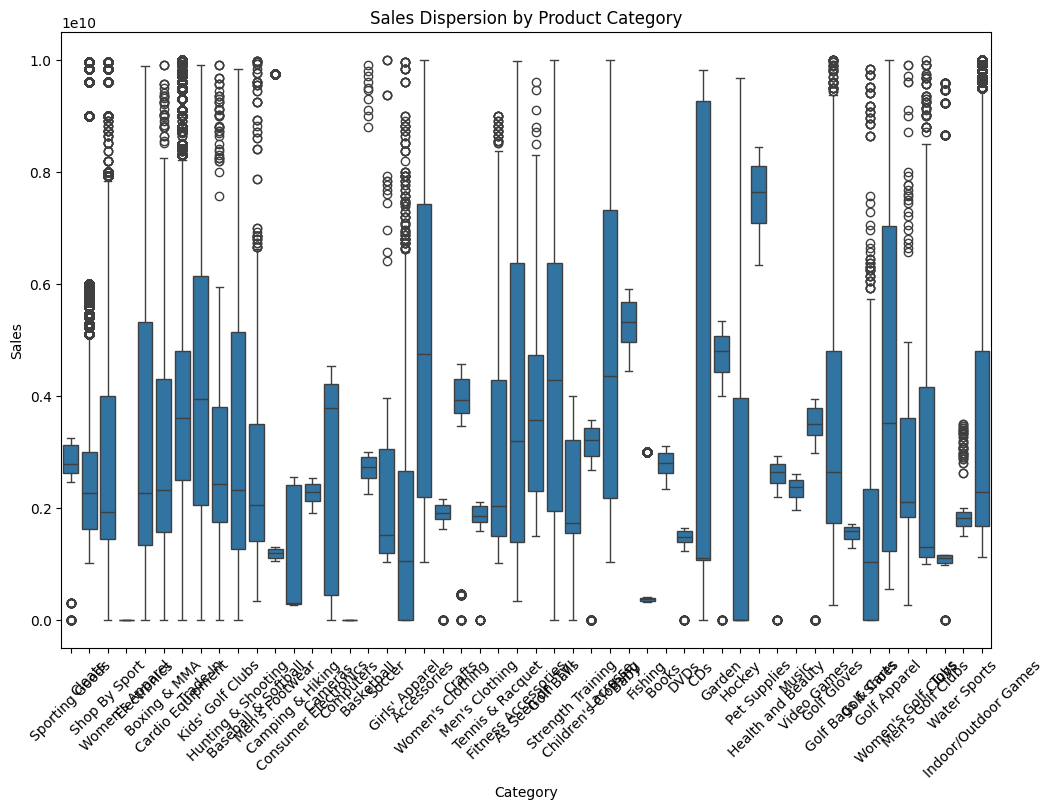

In [12]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x='Category Name', y='Sales per customer', data=df.compute())
plt.title('Sales Dispersion by Product Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


Area Plot of Cumulative Sales Over Time

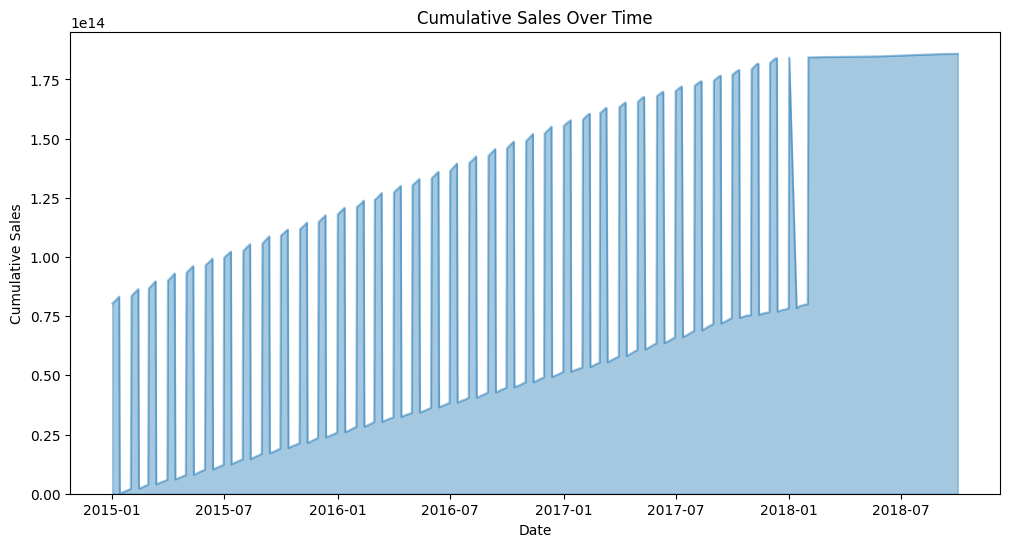

In [13]:
cumulative_sales = df.groupby(df['order_date'].dt.date)['Sales per customer'].sum().cumsum().compute()


plt.figure(figsize=(12, 6))
cumulative_sales.plot(kind='area', alpha=0.4)
plt.title('Cumulative Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Sales')
plt.show()


Line Plot of Average Sales by Product Category

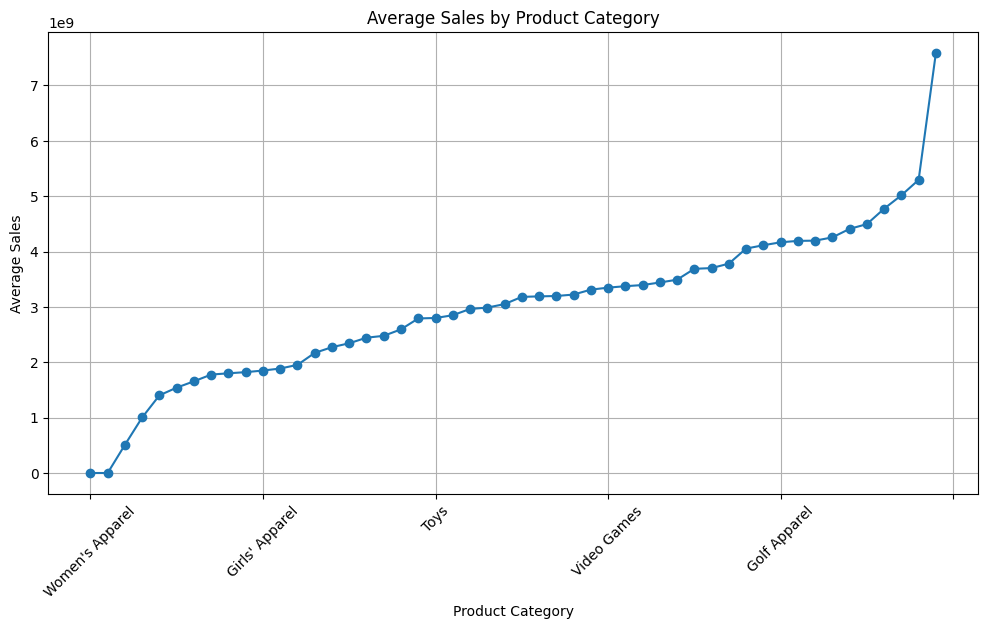

In [14]:

average_sales_by_category = df.groupby('Category Name')['Sales per customer'].mean().compute()


plt.figure(figsize=(12, 6))
average_sales_by_category.sort_values().plot(kind='line', marker='o')
plt.title('Average Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Histogram of Sales by Category

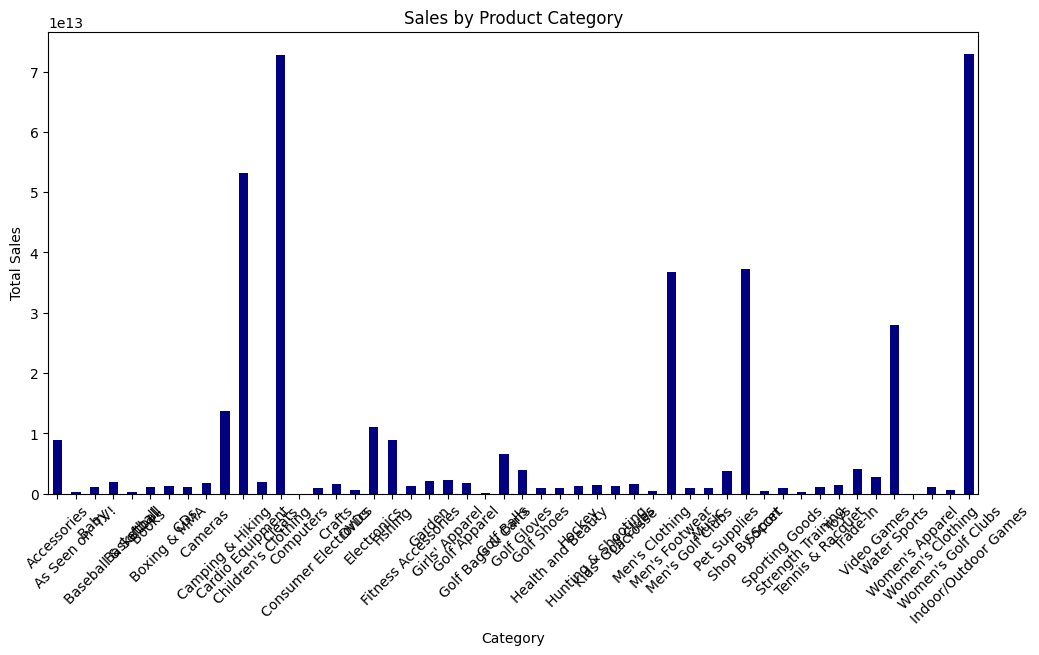

In [15]:
import matplotlib.pyplot as plt
import dask.dataframe as dd
category_sales = df.groupby('Category Name')['Sales per customer'].sum().compute()
plt.figure(figsize=(12, 6))
category_sales.plot(kind='bar', color='navy')
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()



Line Graph for Monthly Sales

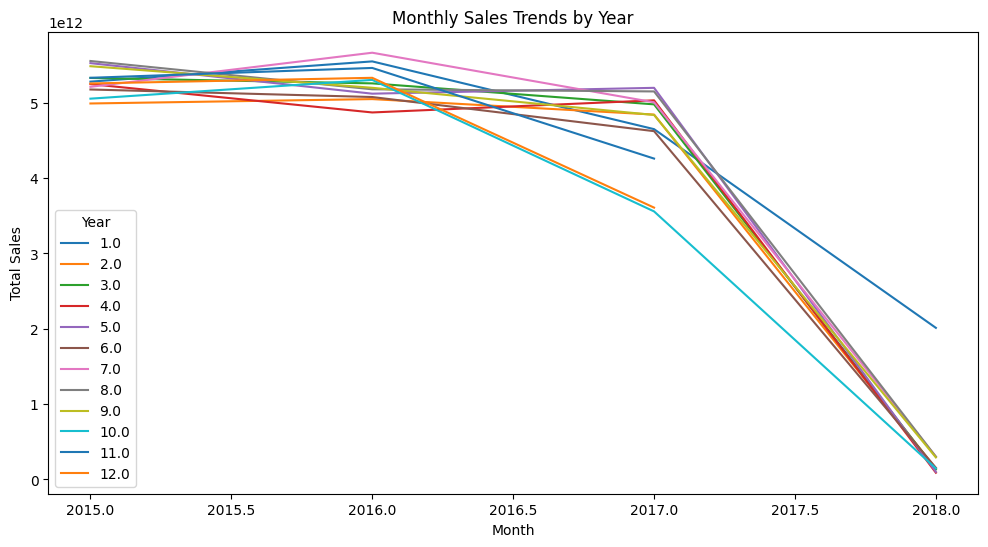

In [16]:
monthly_sales = df.groupby(['Year', 'Month'])['Sales per customer'].sum().compute()
monthly_sales.unstack().plot(kind='line', figsize=(12, 6))
plt.title('Monthly Sales Trends by Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.show()


Heatmap for Daily Sales by Month

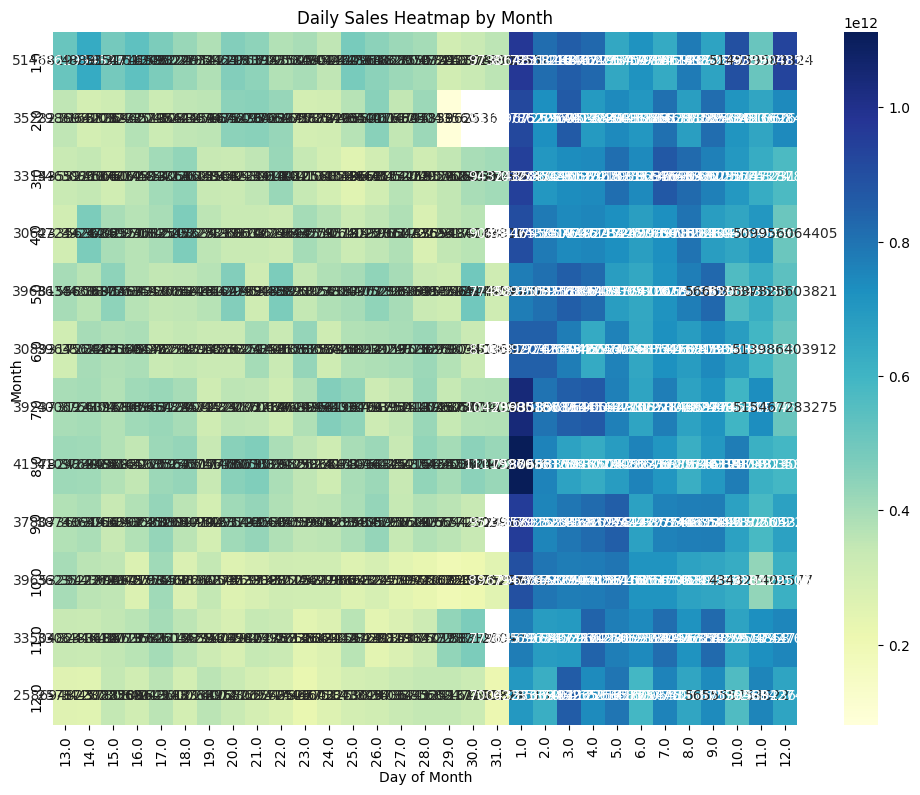

In [23]:
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
pandas_df = pd.read_excel('main_data.xlsx')
df = dd.from_pandas(pandas_df, npartitions=3)
if 'order_date' not in df.columns:
    df['order_date'] = dd.to_datetime(df['order date (DateOrders)'], errors='coerce')
if 'Year' not in df.columns or 'Month' not in df.columns:
    df['Year'] = df['order_date'].dt.year
    df['Month'] = df['order_date'].dt.month
daily_sales = df.groupby([df['order_date'].dt.month, df['order_date'].dt.day])['Sales per customer'].sum().compute()
daily_sales_unstacked = daily_sales.unstack(level=-1)

plt.figure(figsize=(12, 9))
sns.heatmap(daily_sales_unstacked, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title('Daily Sales Heatmap by Month')
plt.xlabel('Day of Month')
plt.ylabel('Month')
plt.show()



Sales Analysis by Category and Customer Segment (Stacked Bar Chart)

<Figure size 1200x600 with 0 Axes>

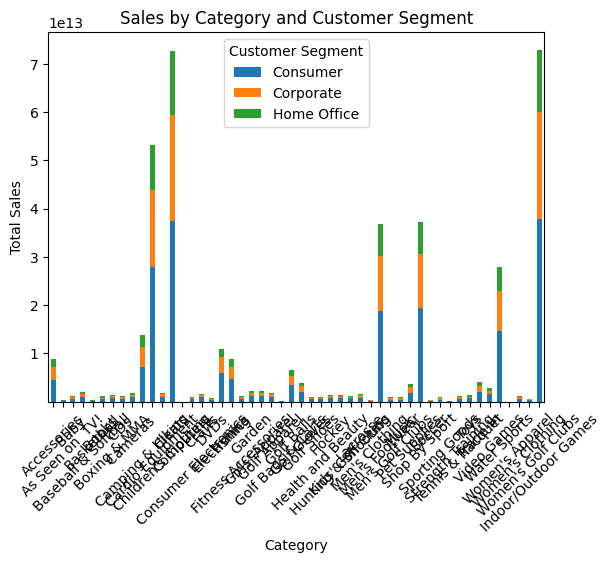

In [18]:
category_segment_sales = df.groupby(['Category Name', 'Customer Segment'])['Sales per customer'].sum().compute().unstack()
plt.figure(figsize=(12, 6))
category_segment_sales.plot(kind='bar', stacked=True)
plt.title('Sales by Category and Customer Segment')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


Resource Consumption by Department (Bubble Chart)

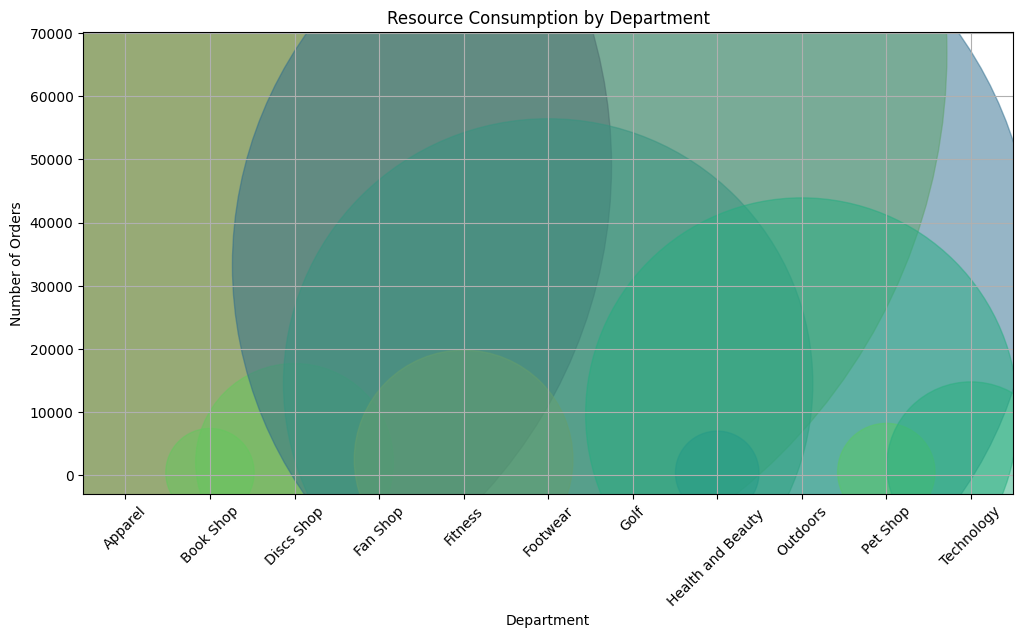

In [19]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import numpy as np  
department_orders = df.groupby('Department Name')['Order Id'].count().compute()
plt.figure(figsize=(12, 6))
plt.scatter(department_orders.index, department_orders, s=department_orders * 10, alpha=0.5, c=np.random.rand(len(department_orders)), cmap='viridis')
plt.title('Resource Consumption by Department')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [26]:
!pip install dash


  Using cached setuptools-69.5.1-py3-none-any.whl.metadata (6.2 kB)
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/7.5 MB 3.4 MB/s eta 0:00:03
   - -------------------------------------- 0.2/7.5 MB 2.5 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/7.5 MB 3.5 MB/s eta 0:00:02
   --- ------------------------------------ 0.6/7.5 MB 4.0 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/7.5 MB 4.2 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/7.5 MB 3.4 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/7.5 MB 4.3 MB/s eta 0:00:02
   -------- ------------------------------- 1.6/7.5 MB 4.6 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/7.5 MB 4.5 MB/s eta 0:00:02
   ---------- ----------------------------- 1.9/7.5 MB 4.5 MB/s eta 0:00:02
   ---------- ----------------------------- 2.0/7.5 MB 4.1 MB/s eta 0:00:02
   ------------- ----------

In [45]:
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install("dash")
install("dask[complete]")
install("plotly")
install("pandas")
install("openpyxl")

import pandas as pd
import dask.dataframe as dd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objs as go


file_path = 'main_data.xlsx'
pandas_df = pd.read_excel(file_path)
df = dd.from_pandas(pandas_df, npartitions=3)

if 'order_date' not in df.columns:
    df['order_date'] = dd.to_datetime(df['order date (DateOrders)'], errors='coerce')


if 'Year' not in df.columns or 'Month' not in df.columns:
    df['Year'] = df['order_date'].dt.year
    df['Month'] = df['order_date'].dt.month


app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Sales Dashboard"),
    
    html.Div([
        dcc.Graph(id='bar-chart-city-sales'),
        dcc.Graph(id='pie-chart-payment-type'),
        dcc.Graph(id='bar-line-chart-sales-profits'),
        dcc.Graph(id='line-chart-discount-trends'),
        dcc.Graph(id='box-plot-sales-category'),
        dcc.Graph(id='area-plot-cumulative-sales'),
        dcc.Graph(id='line-plot-average-sales-category'),
        dcc.Graph(id='histogram-sales-category'),
        dcc.Graph(id='line-graph-monthly-sales'),
        dcc.Graph(id='heatmap-daily-sales'),
        dcc.Graph(id='stacked-bar-category-segment'),
        dcc.Graph(id='bubble-chart-department-orders')
    ])
])

@app.callback(
    Output('bar-chart-city-sales', 'figure'),
    Output('pie-chart-payment-type', 'figure'),
    Output('bar-line-chart-sales-profits', 'figure'),
    Output('line-chart-discount-trends', 'figure'),
    Output('box-plot-sales-category', 'figure'),
    Output('area-plot-cumulative-sales', 'figure'),
    Output('line-plot-average-sales-category', 'figure'),
    Output('histogram-sales-category', 'figure'),
    Output('line-graph-monthly-sales', 'figure'),
    Output('heatmap-daily-sales', 'figure'),
    Output('stacked-bar-category-segment', 'figure'),
    Output('bubble-chart-department-orders', 'figure'),
    Input('bar-chart-city-sales', 'id')  # Just a dummy input to trigger the callback
)
def update_graphs(_):
    
    city_sales = df.groupby('Customer City')['Sales per customer'].sum().compute().sort_values(ascending=False)[:10]
    fig1 = px.bar(city_sales, title='Sales by Customer City')

    
    sales_by_payment_type = df.groupby('Type')['Sales per customer'].sum().compute()
    fig2 = px.pie(sales_by_payment_type, values=sales_by_payment_type.values, names=sales_by_payment_type.index, title='Sales by Payment Type')

    
    monthly_sales = df.groupby('Month')['Sales per customer'].sum().compute()
    monthly_profits = df.groupby('Month')['Benefit per order'].sum().compute()
    fig3 = go.Figure()
    fig3.add_trace(go.Bar(x=monthly_sales.index, y=monthly_sales, name='Total Sales'))
    fig3.add_trace(go.Scatter(x=monthly_profits.index, y=monthly_profits, name='Total Profits', yaxis='y2'))
    fig3.update_layout(
        title='Total Sales and Profits by Month',
        yaxis=dict(title='Total Sales'),
        yaxis2=dict(title='Total Profits', overlaying='y', side='right')
    )

    # Line Chart for Discount Trends
    avg_discounts = df.groupby('Month')['Benefit per order'].mean().compute()
    fig4 = px.line(avg_discounts, title='Average Monthly Discounts')

    # Box Plots for Sales Dispersion by Category
    sales_dispersion = df.compute()
    fig5 = px.box(sales_dispersion, x='Category Name', y='Sales per customer', title='Sales Dispersion by Product Category')

    # Area Plot of Cumulative Sales Over Time
    cumulative_sales = df.groupby(df['order_date'].dt.date)['Sales per customer'].sum().cumsum().compute()
    fig6 = px.area(cumulative_sales, title='Cumulative Sales Over Time')

    # Line Plot of Average Sales by Product Category
    average_sales_by_category = df.groupby('Category Name')['Sales per customer'].mean().compute()
    fig7 = px.line(average_sales_by_category, title='Average Sales by Product Category')

    # Histogram of Sales by Category
    category_sales = df.groupby('Category Name')['Sales per customer'].sum().compute()
    fig8 = px.bar(category_sales, title='Sales by Product Category')

    # Line Graph for Monthly Sales
    monthly_sales = df.groupby(['Year', 'Month'])['Sales per customer'].sum().compute().unstack()
    fig9 = px.line(monthly_sales, title='Monthly Sales Trends by Year')

    # Heatmap for Daily Sales by Month
    daily_sales = df.groupby([df['order_date'].dt.month, df['order_date'].dt.day])['Sales per customer'].sum().compute()
    daily_sales_unstacked = daily_sales.unstack(level=-1)
    fig10 = go.Figure(data=go.Heatmap(
        z=daily_sales_unstacked.values,
        x=daily_sales_unstacked.columns,
        y=daily_sales_unstacked.index,
        colorscale='YlGnBu'
    ))
    fig10.update_layout(title='Daily Sales Heatmap by Month', xaxis_title='Day of Month', yaxis_title='Month')

    # Sales Analysis by Category and Customer Segment (Stacked Bar Chart)
    category_segment_sales = df.groupby(['Category Name', 'Customer Segment'])['Sales per customer'].sum().compute().unstack()
    fig11 = px.bar(category_segment_sales, title='Sales by Category and Customer Segment', barmode='stack')

    
    department_orders = df.groupby('Department Name')['Order Id'].count().compute()
    fig12 = px.scatter(department_orders, title='Resource Consumption by Department', size=department_orders, color=department_orders.index)

    return fig1, fig2, fig3, fig4, fig5, fig6, fig7, fig8, fig9, fig10, fig11, fig12

if __name__ == '__main__':
    app.run_server(debug=True)


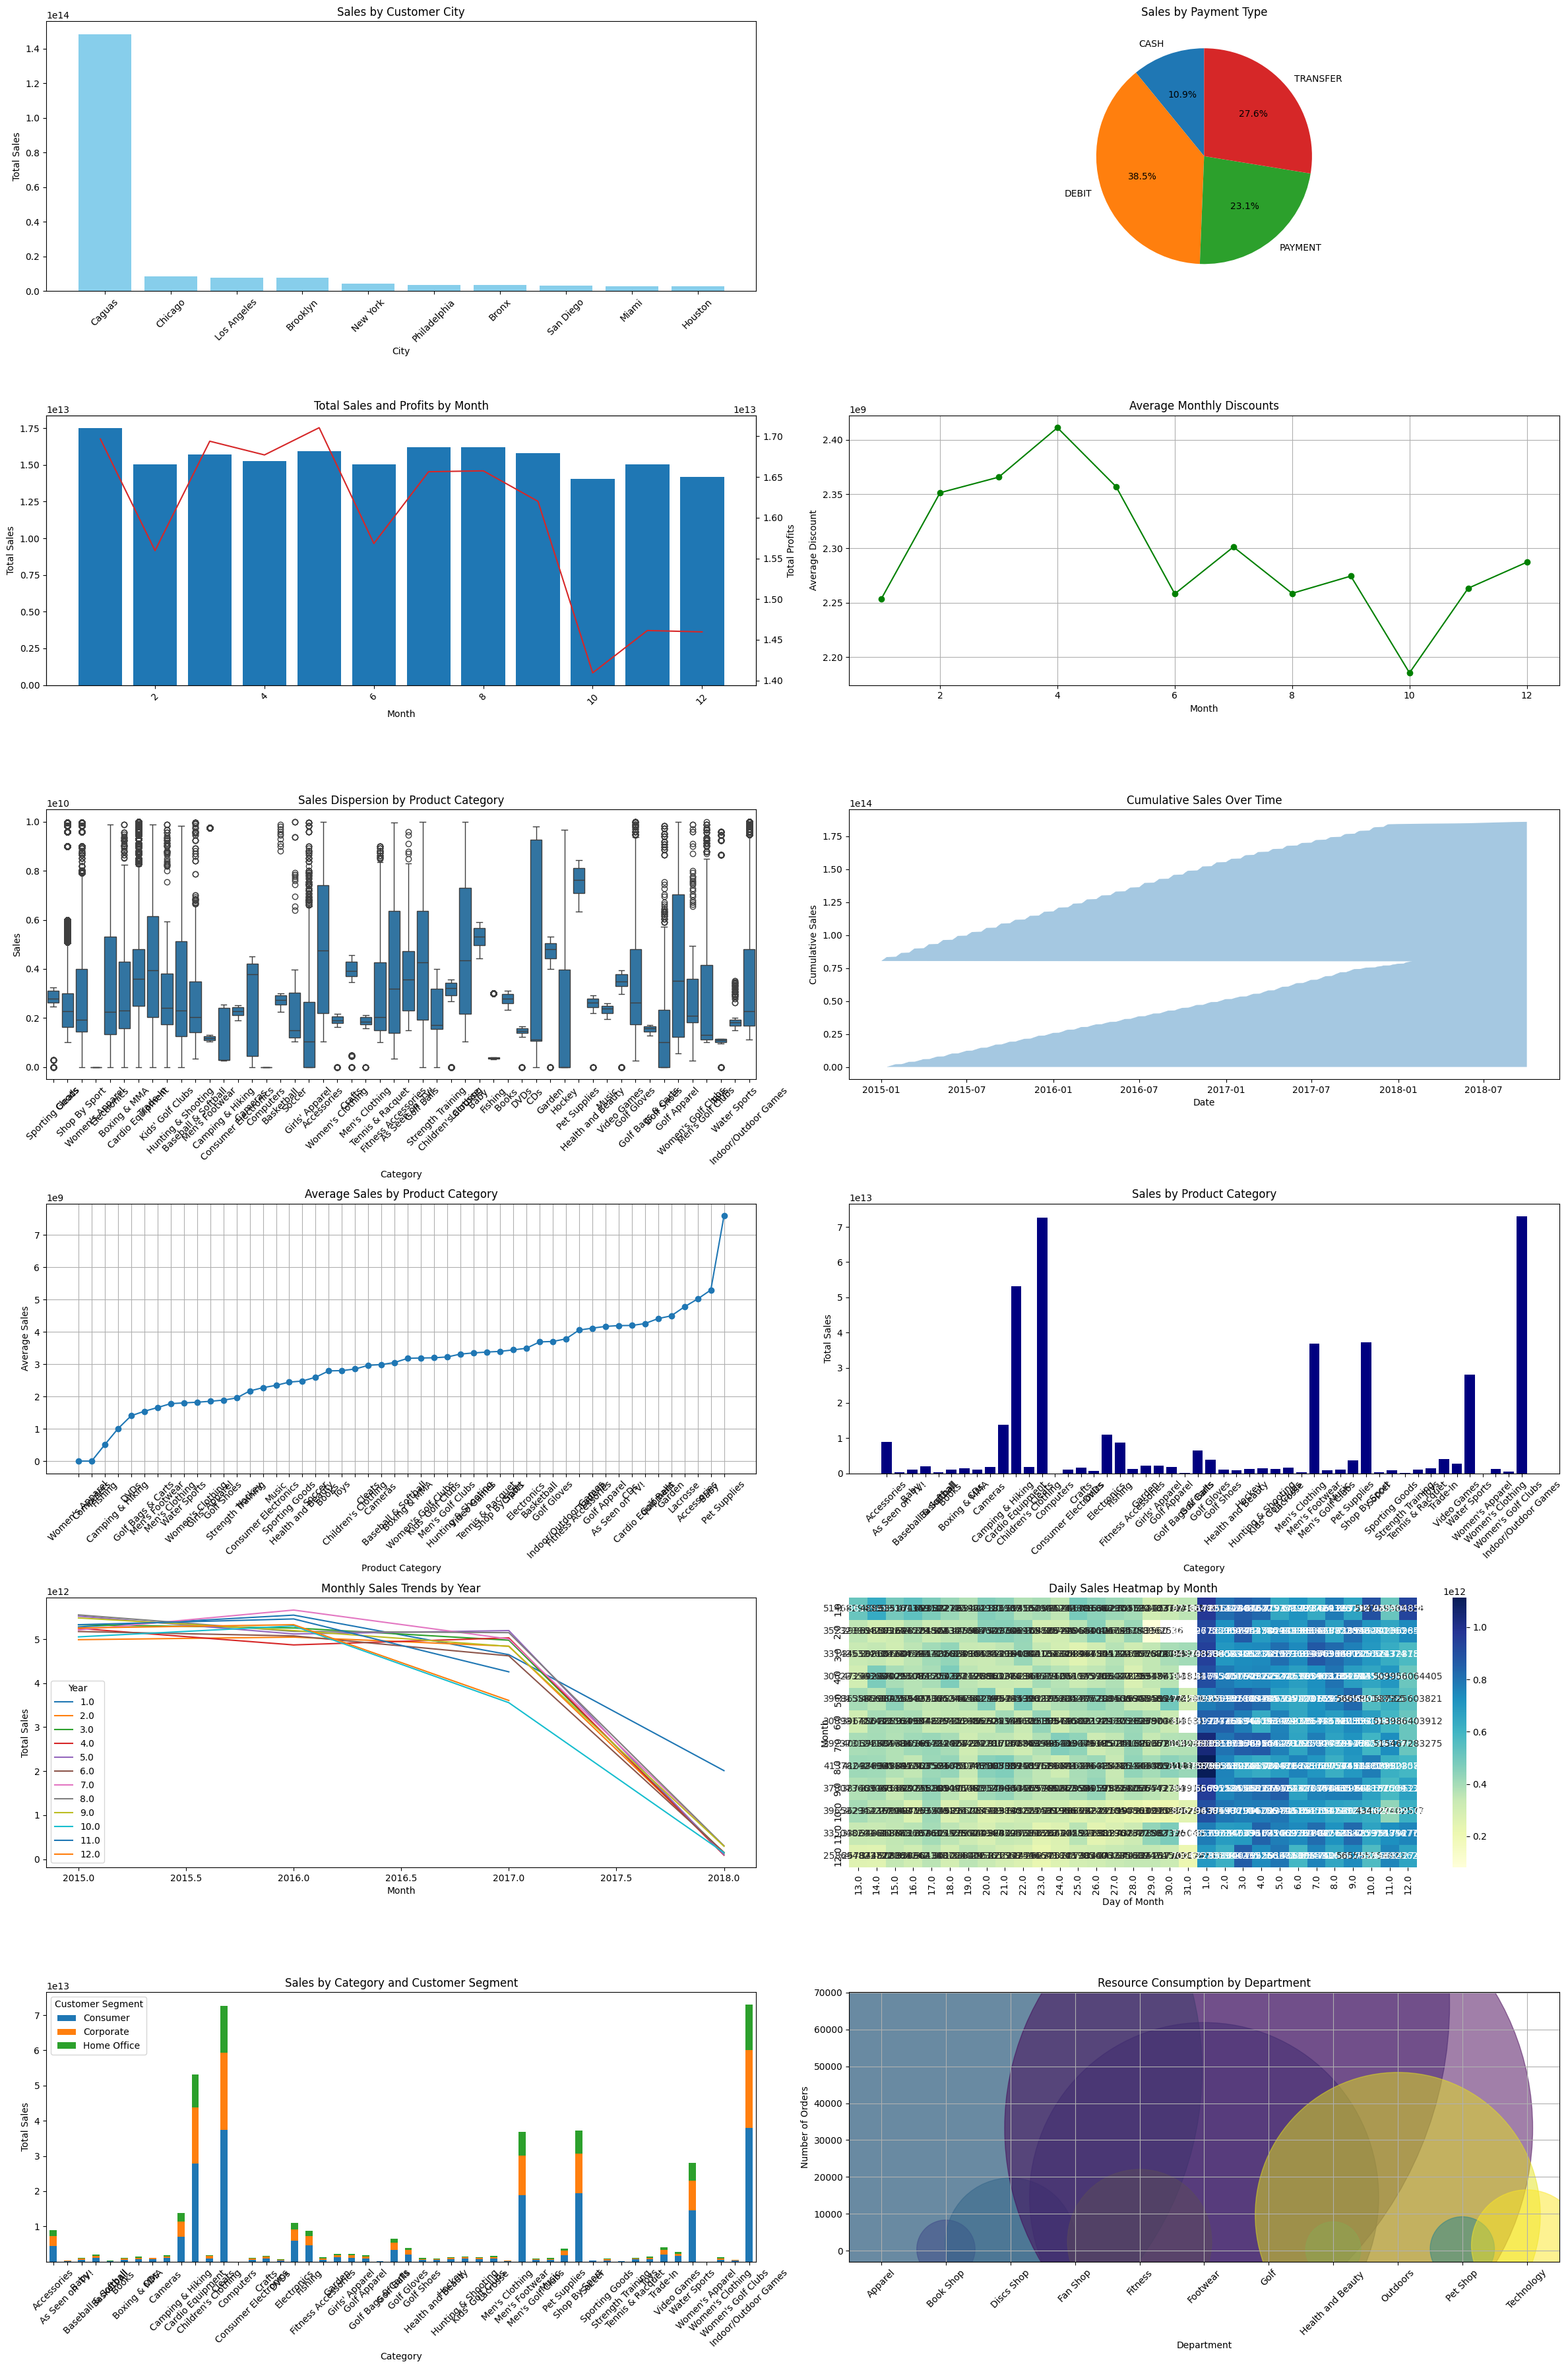

In [50]:
import subprocess
import sys

# Εγκατάσταση των απαραίτητων βιβλιοθηκών
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install("dask[complete]")
install("plotly")
install("pandas")
install("openpyxl")
install("matplotlib")
install("seaborn")

import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Φόρτωση δεδομένων
file_path = 'main_data.xlsx'
pandas_df = pd.read_excel(file_path)
df = dd.from_pandas(pandas_df, npartitions=3)

# Εξασφάλιση datetime στήλης
if 'order_date' not in df.columns:
    df['order_date'] = dd.to_datetime(df['order date (DateOrders)'], errors='coerce')

# Εξασφάλιση Year και Month στηλών
if 'Year' not in df.columns or 'Month' not in df.columns:
    df['Year'] = df['order_date'].dt.year
    df['Month'] = df['order_date'].dt.month

# Δημιουργία των διαγραμμάτων
fig, axs = plt.subplots(6, 2, figsize=(24, 36))

# Bar Chart for Sales by Customer City
city_sales = df.groupby('Customer City')['Sales per customer'].sum().compute().sort_values(ascending=False)[:10]
axs[0, 0].bar(city_sales.index, city_sales, color='skyblue')
axs[0, 0].set_title('Sales by Customer City')
axs[0, 0].set_xlabel('City')
axs[0, 0].set_ylabel('Total Sales')
axs[0, 0].tick_params(axis='x', rotation=45)

# Pie Chart for Sales Distribution by Payment Type
sales_by_payment_type = df.groupby('Type')['Sales per customer'].sum().compute()
axs[0, 1].pie(sales_by_payment_type, labels=sales_by_payment_type.index, autopct='%1.1f%%', startangle=90)
axs[0, 1].set_title('Sales by Payment Type')

# Combined Bar and Line Chart for Sales and Profits by Month
monthly_sales = df.groupby('Month')['Sales per customer'].sum().compute()
monthly_profits = df.groupby('Month')['Benefit per order'].sum().compute()
axs[1, 0].bar(monthly_sales.index, monthly_sales, color='tab:blue', label='Total Sales')
ax2 = axs[1, 0].twinx()
ax2.plot(monthly_profits.index, monthly_profits, color='tab:red', label='Total Profits')
axs[1, 0].set_title('Total Sales and Profits by Month')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Total Sales')
ax2.set_ylabel('Total Profits')
axs[1, 0].tick_params(axis='x', rotation=45)

# Line Chart for Discount Trends
avg_discounts = df.groupby('Month')['Benefit per order'].mean().compute()
axs[1, 1].plot(avg_discounts.index, avg_discounts, marker='o', linestyle='-', color='green')
axs[1, 1].set_title('Average Monthly Discounts')
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('Average Discount')
axs[1, 1].grid(True)

# Box Plots for Sales Dispersion by Category
sns.boxplot(x='Category Name', y='Sales per customer', data=df.compute(), ax=axs[2, 0])
axs[2, 0].set_title('Sales Dispersion by Product Category')
axs[2, 0].set_xlabel('Category')
axs[2, 0].set_ylabel('Sales')
axs[2, 0].tick_params(axis='x', rotation=45)

# Area Plot of Cumulative Sales Over Time
cumulative_sales = df.groupby(df['order_date'].dt.date)['Sales per customer'].sum().cumsum().compute()
axs[2, 1].fill_between(cumulative_sales.index, cumulative_sales, alpha=0.4)
axs[2, 1].set_title('Cumulative Sales Over Time')
axs[2, 1].set_xlabel('Date')
axs[2, 1].set_ylabel('Cumulative Sales')

# Line Plot of Average Sales by Product Category
average_sales_by_category = df.groupby('Category Name')['Sales per customer'].mean().compute()
axs[3, 0].plot(average_sales_by_category.sort_values().index, average_sales_by_category.sort_values(), marker='o')
axs[3, 0].set_title('Average Sales by Product Category')
axs[3, 0].set_xlabel('Product Category')
axs[3, 0].set_ylabel('Average Sales')
axs[3, 0].tick_params(axis='x', rotation=45)
axs[3, 0].grid(True)

# Histogram of Sales by Category
category_sales = df.groupby('Category Name')['Sales per customer'].sum().compute()
axs[3, 1].bar(category_sales.index, category_sales, color='navy')
axs[3, 1].set_title('Sales by Product Category')
axs[3, 1].set_xlabel('Category')
axs[3, 1].set_ylabel('Total Sales')
axs[3, 1].tick_params(axis='x', rotation=45)

# Line Graph for Monthly Sales
monthly_sales = df.groupby(['Year', 'Month'])['Sales per customer'].sum().compute().unstack()
monthly_sales.plot(kind='line', ax=axs[4, 0])
axs[4, 0].set_title('Monthly Sales Trends by Year')
axs[4, 0].set_xlabel('Month')
axs[4, 0].set_ylabel('Total Sales')
axs[4, 0].legend(title='Year')

# Heatmap for Daily Sales by Month
daily_sales = df.groupby([df['order_date'].dt.month, df['order_date'].dt.day])['Sales per customer'].sum().compute()
daily_sales_unstacked = daily_sales.unstack(level=-1)
sns.heatmap(daily_sales_unstacked, cmap="YlGnBu", annot=True, fmt=".0f", ax=axs[4, 1])
axs[4, 1].set_title('Daily Sales Heatmap by Month')
axs[4, 1].set_xlabel('Day of Month')
axs[4, 1].set_ylabel('Month')

# Sales Analysis by Category and Customer Segment (Stacked Bar Chart)
category_segment_sales = df.groupby(['Category Name', 'Customer Segment'])['Sales per customer'].sum().compute().unstack()
category_segment_sales.plot(kind='bar', stacked=True, ax=axs[5, 0])
axs[5, 0].set_title('Sales by Category and Customer Segment')
axs[5, 0].set_xlabel('Category')
axs[5, 0].set_ylabel('Total Sales')
axs[5, 0].tick_params(axis='x', rotation=45)

# Κατανάλωση Πόρων ανά Τμήμα (Bubble Chart)
department_orders = df.groupby('Department Name')['Order Id'].count().compute()
scatter = axs[5, 1].scatter(department_orders.index, department_orders, s=department_orders * 10, alpha=0.5, c=np.random.rand(len(department_orders)), cmap='viridis')
axs[5, 1].set_title('Resource Consumption by Department')
axs[5, 1].set_xlabel('Department')
axs[5, 1].set_ylabel('Number of Orders')
axs[5, 1].tick_params(axis='x', rotation=45)
axs[5, 1].grid(True)

plt.tight_layout()
plt.savefig('all_charts.png')
plt.show()
